In [1]:
# Module Importations
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.cluster import KMeans

In [3]:
# Constants
plt.style.use('seaborn-whitegrid')
plt.rc('figure', autolayout = True)
plt.rc(
    'axes',
    labelweight = 'bold',
    labelsize = 'large',
    titleweight = 'bold',
    titlesize = 14,
    titlepad = 10
)

In [4]:
# Load data
data_string = r'C:\Developer\scratch-pad-python\Datasets\californian_housing_data.csv'
df = pd.read_csv(data_string)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [5]:
# Trim to variables of interest
X = df.loc[:, ['median_income', 'latitude', 'longitude']]
X.head()

,median_income,latitude,longitude
0,8.3252,37.88,-122.23
1,8.3014,37.86,-122.22
2,7.2574,37.85,-122.24
3,5.6431,37.85,-122.25
4,3.8462,37.85,-122.25


k-means clustering is sensitive to scale, so it often makes sense to rescale or normalise data with extreme values. 
 
This isn't needed here.

In [6]:
# Create cluster feature
kmeans = KMeans(n_clusters = 6)

# Create cluster column; Fit data
X['Cluster'] = kmeans.fit_predict(X)
X['Cluster'] = X['Cluster'].astype('category')

X.head()

,median_income,latitude,longitude,Cluster
0,8.3252,37.88,-122.23,1
1,8.3014,37.86,-122.22,1
2,7.2574,37.85,-122.24,1
3,5.6431,37.85,-122.25,1
4,3.8462,37.85,-122.25,5


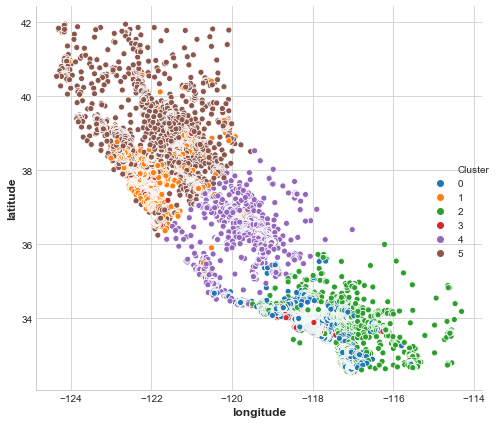

In [8]:
# Scatter plot to visualise geographic distribution of clusters
sns.relplot(x = 'longitude', y = 'latitude', hue = 'Cluster', data = X, height = 6);